In [1]:
import tensorflow as tf

Loading -"MNIST DATA SET"


In [2]:
mnist=tf.keras.datasets.mnist

AFTER LOADING THE MNIST DATA,Divide into train and test datasets

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
import numpy as np

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

C:\Users\akshay desale\AppData\Local\Temp\ipykernel_14828\2524643019.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


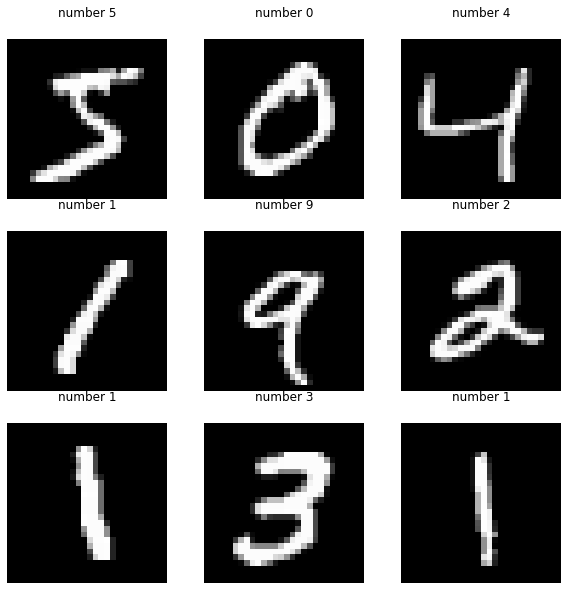

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axs=plt.subplots(3,3,figsize=(10,10))
plt.gray()
for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('number {}'.format(y_train[i]))
fig.show()

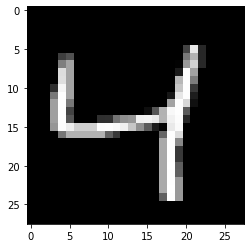

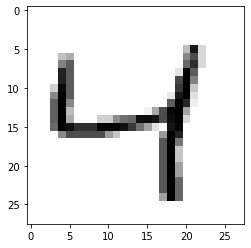

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[2],cmap=plt.cm.binary)

Checking the values of each pixels
before normalization

In [9]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

Normalization of data ----pre processing steps

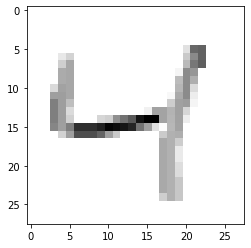

In [10]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[2],cmap=plt.cm.binary)

After Normalization

In [11]:
print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(y_train[2])

4


In [13]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Creating a Deep Neural Network

Training on 60,000 samples of MNIST handwritten dataset

In [25]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten ,Conv2D,MaxPooling2D
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=x_trainr.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [26]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [28]:
print('Toal Training Samples=',len(x_trainr))

Toal Training Samples= 60000


In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 47s 35ms/step - loss: 0.3607 - accuracy: 0.8851 - val_loss: 0.1313 - val_accuracy: 0.9610
Epoch 2/5
1313/1313 [==============================] - 47s 36ms/step - loss: 0.1182 - accuracy: 0.9641 - val_loss: 0.0950 - val_accuracy: 0.9712
Epoch 3/5
1313/1313 [==============================] - 47s 35ms/step - loss: 0.0823 - accuracy: 0.9740 - val_loss: 0.0950 - val_accuracy: 0.9723
Epoch 4/5
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0738 - val_accuracy: 0.9792
Epoch 5/5
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0676 - val_accuracy: 0.9801


In [35]:
test_loss,test_acc=model.evaluate(x_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0616 - accuracy: 0.9808
0.06156928837299347
0.9807999730110168


In [36]:
predictions=model.predict([x_testr])

313/313 [==============================] - 3s 9ms/step


In [37]:
print(predictions)

[[2.43266477e-05 5.64667232e-07 1.16972260e-05 ... 9.99843001e-01
  1.20885147e-06 1.07614840e-04]
 [3.42532527e-04 1.37555890e-06 9.99645472e-01 ... 8.69907808e-07
  6.64328263e-06 2.71489938e-07]
 [2.21503233e-05 9.99706805e-01 2.11171682e-05 ... 6.77977960e-06
  2.88895772e-05 7.50124718e-06]
 ...
 [3.02447205e-07 3.37454452e-07 5.89378544e-07 ... 2.07232970e-05
  2.40343661e-06 2.03035452e-05]
 [1.43321449e-05 2.64267536e-12 1.45960710e-09 ... 2.59175906e-12
  4.16547227e-05 9.48045681e-07]
 [1.03389924e-04 7.46207078e-08 2.36314918e-05 ... 2.82653345e-09
  1.92893654e-04 3.34850142e-06]]
